#### <span style="display:block; padding:15px; background-color:#FFFFFF; margin:0; color:#044f48; font-family:'Times New Roman', serif; font-size:150%;text-align:left; border-radius:10px; font-weight:bold;">Building a Collaborative and Content-Based Recommender System for Anime</span> <a id="section1_1"></a>

<p style="text-align:center; ">
<img src="https://pbmainstream.com/wp-content/uploads/2019/02/FunFilms_DBSBroly_Landing.0-900x506.jpg" style='width: 800px; height: 400px;'>
</p>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#32a8a8;margin:0;color:black;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 2px 2px;overflow:hidden;font-weight:500">Table of Contents</p>

|No  | Contents |  
|:---| :---     |
|1   | [<font color="#42b0e3"> Project Overview</font>](#1)                   
|2   | [<font color="#42b0e3"> About Dataset</font>](#2)                        
|3   | [<font color="#42b0e3"> Importing Packages</font>](#3)                    
|4   | [<font color="#42b0e3"> Loading Data</font>](#4)                       
|5   | [<font color="#42b0e3"> Data Cleaning</font>](#5)      
|6   | [<font color="#42b0e3"> Exploratory data analysis (EDA)</font>](#6)              
|7   | [<font color="#42b0e3"> Data prepocessing</font>](#7)      
|8   | [<font color="#42b0e3"> Model training</font>](#8)        
|9   | [<font color="#42b0e3"> Model performance</font>](#9)        
|10  | [<font color="#42b0e3"> Conclusion and Insights</font>](#10)        

***

<a id="1"></a>
# <p style="padding:10px;background-color:#32a8a8;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 2px 2px;overflow:hidden;font-weight:500">Project Overview</p>

#### 1.1 INTRODUCTION <a id="section1_1"></a>

Recommender systems are algorithms designed to suggest items to users based on various inputs, such as their past behavior and preferences.These systems are essential in many domains, including e-commerce, music, movies, and anime, as they enhance user experience by providing personalized recommendations.

**Importance in the Context of Anime**

* The anime industry produces a vast and diverse array of content, making it challenging for users to find anime that align with their interests.

* A well-designed recommender system helps users navigate the extensive anime catalog, discovering titles they are likely to enjoy based on their unique tastes.

* By delivering personalized recommendations, these systems can increase user engagement and satisfaction, fostering a deeper connection with the platform.


#### 1.2 Objectives <a id="section1_1"></a>

* The primary objective of this project is to develop a hybrid recommender system that combines collaborative and content-based filtering techniques.

* This system aims to predict how users will rate anime titles they have not yet seen, using their historical preferences and interactions.

* By accurately predicting user ratings, the recommender system will provide tailored anime suggestions, enhancing the user's discovery process and overall viewing experience.

<a id="2"></a>
# <p style="padding:10px;background-color:#32a8a8;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 2px 2px;overflow:hidden;font-weight:500">About Dataset</p>

This data set contains information on user preference data from **570 3555 users** on **12294 anime**. It contains information about anime and user ratings, split across several CSV files. It's designed for a recommender systems project where we will predict user ratings for unseen anime for **633686 users**.

Data Summary:

* Anime Information (**anime.csv**): Contains details about each anime, including title, genre, type (movie, TV, etc.), number of episodes, average rating, and member count.
* User Ratings (**train.csv**): Records user ratings for specific anime entries. Includes user ID, anime ID, and the rating provided (*or -1 if watched but not rated*).
* Test Set (**test.csv**): Contains user IDs and anime IDs for which we will predict ratings. No ratings are provided in this file.
* Submission Format (**submission.csv - for reference**): Illustrates the expected format for our final predictions. It combines user ID and anime ID into a single ID and includes the predicted rating for each user-anime pair.


Additional Information:

Original data comes from MyAnimeList.net.
Source: Adapted open-source Kaggle dataset (https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database).

<a id="1"></a>
# <p style="padding:10px;background-color:#32a8a8;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 2px 2px;overflow:hidden;font-weight:500">Importing Packages</p>

<div class="alert alert-block alert-info">
<b>Importing Packages</b> is an essential step in any data analysis or machine learning project, as it allows you to access and utilize various libraries and tools to perform specific tasks. Python provides a rich ecosystem of packages for data manipulation, visualization, statistical analysis, and machine learning. Commonly used packages include pandas for data manipulation, matplotlib and seaborn for data visualization, scikit-learn for machine learning, and numpy for numerical computations. Importing the right packages at the beginning of your analysis ensures that you have the necessary tools to effectively explore and analyze your data.
</di>

In [6]:
# Install the 'surprise' package
!pip install surprise

In [7]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import surprise    # Run "!pip install surprise" in a new cell to install this package in Colab
from surprise import Reader, Dataset, SVD, SVDpp, accuracy, NormalPredictor, BaselineOnly, NMF, SlopeOne, CoClustering
from surprise.model_selection import train_test_split, cross_validate
from surprise.accuracy import rmse
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import ward, dendrogram
import scipy.cluster.hierarchy as sch

from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, preprocessing)

from time import time
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')


***

<a id="1"></a>
# <p style="padding:10px;background-color:#32a8a8;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 2px 2px;overflow:hidden;font-weight:500">Loading Data</p>

<div class="alert alert-block alert-info">
<b>Explanation</b> Loading data is a crucial step in any data analysis or machine learning project. It involves reading data from a source (like a CSV file, a database, or an API) and loading it into a format that can be used for analysis and model building.
</di>

**1. Load datasets**

In [8]:
# Define the URLs to your datasets in GitHub
anime_url = 'https://raw.githubusercontent.com/tsemoeti/MM4_2401FTDS-Anime-Recommender-System-Project-2024/Data-Preprocessing/data/anime.csv'
train_url = 'https://raw.githubusercontent.com/tsemoeti/MM4_2401FTDS-Anime-Recommender-System-Project-2024/Data-Preprocessing/data/train.csv'
test_url = 'https://raw.githubusercontent.com/tsemoeti/MM4_2401FTDS-Anime-Recommender-System-Project-2024/Data-Preprocessing/data/test.csv'
submission_url = 'https://raw.githubusercontent.com/tsemoeti/MM4_2401FTDS-Anime-Recommender-System-Project-2024/Data-Preprocessing/data/submission.csv'

# Loading the datasets
df_anime = pd.read_csv(anime_url)
df_anime_user_rating = pd.read_csv(train_url)
df_anime_test = pd.read_csv(test_url)
df_anime_predicted_rating = pd.read_csv(submission_url)

**2. Display the four dataframes**

Display the anime dataframe

In [9]:
# Display first few rows of anime dataframe

print(f"Shape of The Anime Dataset : {df_anime.shape}")
print(f"\nGlimpse of The Dataset :")
df_anime.head(2).style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Shape of The Anime Dataset : (12294, 7)

Glimpse of The Dataset :


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Military, Shounen",TV,64,9.260000,793665


Display the train dataframe

In [10]:
# Display first few rows of train dataframe

print(f"Shape of The train Dataset : {df_anime_user_rating.shape}")
print(f"\nGlimpse of The train Dataset :")
df_anime_user_rating.head(2).style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})


Shape of The train Dataset : (5703555, 3)

Glimpse of The train Dataset :


,user_id,anime_id,rating
0,1,11617,10
1,1,11757,10


Display the test dataframe

In [11]:
# Display first few rows of test dataframe

print(f"Shape of The test Dataset : {df_anime_test.shape}")
print(f"\nGlimpse of The test Dataset :")
df_anime_test.head(3).style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Shape of The test Dataset : (633686, 2)

Glimpse of The test Dataset :


,user_id,anime_id
0,40763,21405
1,68791,10504
2,40487,1281


Display the dataframe format for the submission file

In [12]:
# Display first few rows of submission format for the predicted rating dataframe

print(f"Shape of The Submission Dataset : {df_anime_predicted_rating.shape}")
print(f"\nGlimpse of The Predicted Ratings Submission Dataset :")
df_anime_predicted_rating.head(2).style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Shape of The Submission Dataset : (3, 2)

Glimpse of The Predicted Ratings Submission Dataset :


,ID,rating
0,14862_1232,5.300000
1,14862_7974,4.000000


**3. Shapes of our Data**

In [13]:
print (df_anime.shape)
print (df_anime_user_rating.shape)
print (df_anime_test.shape)

(12294, 7)
(5703555, 3)
(633686, 2)


**Comment:** From the above output it is observed that,

* Anime has ~12294 rows, and 7 columns
* Anime_user_rating (Train)has ~5703555 rows, and 3 columns
* Anime_user_id (Test) has ~633686 rows, and 2 columns

<a id="1"></a>
# <p style="padding:10px;background-color:#32a8a8;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 2px 2px;overflow:hidden;font-weight:500">Data Cleaning</p>

<div class="alert alert-block alert-success">
  <b>Data cleaning</b> is a crucial step in the data analysis process, involving the correction or removal of incorrect, corrupted, duplicate, or incomplete data within a dataset. Through various techniques such as filling missing values, removing outliers, and standardizing data formats, it ensures the accuracy and reliability of subsequent analyses and decision-making.
</div

**1. Check data types**
* Check the data types of the anime and train, and the test data.

In [14]:
print(df_anime.info())
print("\n")  # Add an empty line for better readability

print(df_anime_user_rating.info())
print("\n")

print(df_anime_test.info())
print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703555 entries, 0 to 5703554
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 130.5 MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633686 entries, 0 to 633685
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   user_id   63368

**2. Check and handle missing values**

In [15]:
print(df_anime.isnull().sum())
print("\n")  # Add an empty line for better readability
print(df_anime_user_rating.isnull().sum())
print("\n")
print(df_anime_test.isnull().sum())

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


user_id     0
anime_id    0
rating      0
dtype: int64


user_id     0
anime_id    0
dtype: int64


We have identified that there are missing values in the **genre**, **type**, and **rating** columns in the **anime** dataset


In [16]:
# Handle Missing Values in the Anime Dataset

# Fill missing genre and type with "Unknown"
df_anime['genre'] = df_anime['genre'].fillna('Unknown')
df_anime['type'] = df_anime['type'].fillna('Unknown')

# Fill missing rating with the mean
df_anime['rating'] = df_anime['rating'].fillna(df_anime['rating'].mean())

warnings.filterwarnings("ignore")

In [17]:
# Recheck for remaining missing values
print(df_anime.isnull().sum())
print("\n")
print(df_anime_user_rating.isnull().sum())
print("\n")
print(df_anime_test.isnull().sum())

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64


user_id     0
anime_id    0
rating      0
dtype: int64


user_id     0
anime_id    0
dtype: int64


**3. Merge the anime and train data**

*  Merge the datasets on the 'anime_id' column

In [18]:
# Merge datasets with left join to ensure all user ratings are included
df_merged = pd.merge(df_anime_user_rating, df_anime, on='anime_id', how='left')

# Display first and last few rows of merged dataframe
print(f"Shape of The Merged Dataset: {df_merged.shape}")
print(f"\nGlimpse of The Merged Dataset:")
df_merged.head(2).style.set_properties(**{"background-color": "#2a9d8f", "color": "white", "border": "1.5px solid black"})

Shape of The Merged Dataset: (5703555, 9)

Glimpse of The Merged Dataset:


,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
0,1,11617,10,High School DxD,"Comedy, Demons, Ecchi, Harem, Romance, School",TV,12,7.700000,398660.000000
1,1,11757,10,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.830000,893100.000000


* Rename the rating columns for clarity

In [19]:
# Rename the rating columns for clarity
df_merged.rename(columns={'rating_x': 'user_rating', 'rating_y': 'average_anime_rating'}, inplace=True)
df_merged.head(2).style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,user_id,anime_id,user_rating,name,genre,type,episodes,average_anime_rating,members
0,1,11617,10,High School DxD,"Comedy, Demons, Ecchi, Harem, Romance, School",TV,12,7.700000,398660.000000
1,1,11757,10,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.830000,893100.000000


**3. Recheck for remaining missing values after merging**

In [20]:
print(df_merged.isnull().sum())

user_id                 0
anime_id                0
user_rating             0
name                    2
genre                   2
type                    2
episodes                2
average_anime_rating    2
members                 2
dtype: int64


In [21]:
# Identify and Display Users with Missing Anime Information

# Filter rows with missing anime information
df_missing_anime = df_merged[df_merged['name'].isna()]

# Display the users with missing anime information
print(f"Shape of The Dataset with Missing Anime Information: {df_missing_anime.shape}")
print(f"\nUsers with Missing Anime Information:")
display(df_missing_anime.head(10).style.set_properties(**{"background-color": "#2a9d8f", "color": "white", "border": "1.5px solid black"}))

Shape of The Dataset with Missing Anime Information: (2, 9)

Users with Missing Anime Information:


,user_id,anime_id,user_rating,name,genre,type,episodes,average_anime_rating,members
2669325,34240,30913,9,nan,nan,nan,nan,nan,nan
2888605,37442,30913,9,nan,nan,nan,nan,nan,nan


* This suggests that only 2 anime entries from the df_anime_user_rating dataframe could not be matched with an entry in the df_anime dataframe.
<br>

**4. Handle missing values of the two users**

In [22]:
# Fill missing name with a default value "Unknown"
df_merged['name'] = df_merged['name'].fillna('Unknown')

# Fill missing genre with a default value "Unknown"
df_merged['genre'] = df_merged['genre'].fillna('Unknown')

# Fill missing type with a default value "Unknown"
df_merged['type'] = df_merged['type'].fillna('Unknown')

# Convert 'episodes' to numeric, coercing errors and filling NaNs with a default numeric value
df_merged['episodes'] = pd.to_numeric(df_merged['episodes'], errors='coerce')
# Calculate the median of 'episodes'
episodes_median = df_merged['episodes'].median()
# Fill missing 'episodes' with the median value
df_merged['episodes'] = df_merged['episodes'].fillna(episodes_median)

# Fill missing average_anime_rating with the global mean of average_anime_rating
av_rating_mean = df_merged['average_anime_rating'].mean()
df_merged['average_anime_rating'] = df_merged['average_anime_rating'].fillna(av_rating_mean)

# Fill missing members with the global mean of members
members_mean = df_merged['members'].mean()
df_merged['members'] = df_merged['members'].fillna(members_mean)

In [23]:
# Verify that there are no missing values remaining
print(df_merged.isnull().sum())

user_id                 0
anime_id                0
user_rating             0
name                    0
genre                   0
type                    0
episodes                0
average_anime_rating    0
members                 0
dtype: int64


**5. Checking for duplicates in all datasets**

In [24]:
# Check for duplicates in all datasets
print("\nNumber of duplicate rows in Anime Dataset:", df_anime.duplicated().sum())
print("Number of duplicate rows in train Dataset:", df_anime_user_rating.duplicated().sum())
print("Number of duplicate rows in test Dataset:", df_anime_test.duplicated().sum())
print("\nNumber of duplicate rows in merged Dataset:", df_merged.duplicated().sum())


Number of duplicate rows in Anime Dataset: 0
Number of duplicate rows in train Dataset: 1
Number of duplicate rows in test Dataset: 0

Number of duplicate rows in merged Dataset: 1


* Remove duplicates in the train and merged dataset & Verify the removal of duplicates

In [25]:
# Remove duplicates in the train and merged dataset
df_anime_user_rating = df_anime_user_rating.drop_duplicates()
df_merged = df_merged.drop_duplicates()

#Verify the removal of duplicate
print("Number of duplicate rows in train Dataset after cleaning:", df_anime_user_rating.duplicated().sum())
print("Number of duplicate rows in merged Dataset after cleaning:", df_merged.duplicated().sum())

Number of duplicate rows in train Dataset after cleaning: 0
Number of duplicate rows in merged Dataset after cleaning: 0


<a id="5"></a>
# <p style="padding:10px;background-color:#32a8a8;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 2px 2px;overflow:hidden;font-weight:500">Exploratory Data Analysis (EDA)</p>

<div class="alert alert-block alert-info">
<b>Exploratory Data Analysis (EDA)</b> serves as a foundational step in the data preprocessing phase, aimed at understanding the underlying patterns, relationships, and structure of the data. It involves various techniques such as visualizations, summary statistics, and correlation analysis to uncover insights and identify potential issues. EDA helps in forming hypotheses, guiding further analysis, and making informed decisions about data preprocessing and modeling.
</di>

In [26]:
## Summary statistics
print(df_anime.describe())
print()
print(df_anime_user_rating.describe())
print()
print(df_merged.describe())

           anime_id        rating       members
count  12294.000000  12294.000000  1.229400e+04
mean   14058.221653      6.473902  1.807134e+04
std    11455.294701      1.017096  5.482068e+04
min        1.000000      1.670000  5.000000e+00
25%     3484.250000      5.900000  2.250000e+02
50%    10260.500000      6.550000  1.550000e+03
75%    24794.500000      7.170000  9.437000e+03
max    34527.000000     10.000000  1.013917e+06

            user_id      anime_id        rating
count  5.703554e+06  5.703554e+06  5.703554e+06
mean   3.674460e+04  8.902140e+03  7.808691e+00
std    2.101174e+04  8.882175e+03  1.572449e+00
min    1.000000e+00  1.000000e+00  1.000000e+00
25%    1.898500e+04  1.239000e+03  7.000000e+00
50%    3.680200e+04  6.213000e+03  8.000000e+00
75%    5.487300e+04  1.407500e+04  9.000000e+00
max    7.351600e+04  3.447500e+04  1.000000e+01

            user_id      anime_id   user_rating      episodes  \
count  5.703554e+06  5.703554e+06  5.703554e+06  5.703554e+06   
mean

In [27]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5703554 entries, 0 to 5703554
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   user_id               int64  
 1   anime_id              int64  
 2   user_rating           int64  
 3   name                  object 
 4   genre                 object 
 5   type                  object 
 6   episodes              float64
 7   average_anime_rating  float64
 8   members               float64
dtypes: float64(3), int64(3), object(3)
memory usage: 435.1+ MB


In [28]:
print(df_merged.nunique())

user_id                 69481
anime_id                 9838
user_rating                10
name                     9838
genre                    3042
type                        7
episodes                  174
average_anime_rating      575
members                  6473
dtype: int64


## 1. User-related: User behavior analysis
This section will delve into how users interact with the anime data, providing insights for building an effective recommender system.

* Distribution of ratings:
    - This will help us understand user preferences and identify potential biases (e.g., skewed towards high or low ratings).

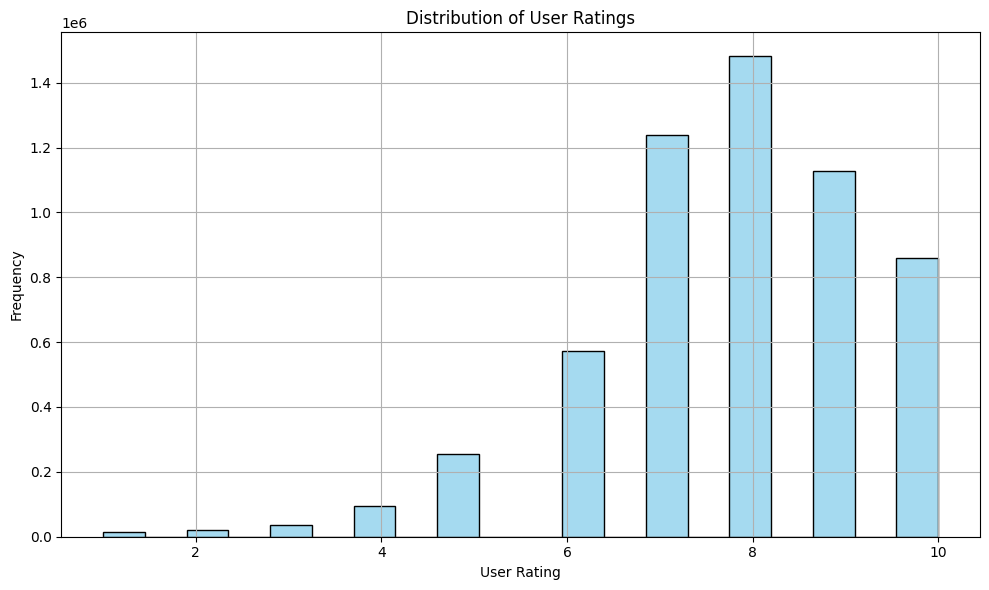

In [29]:
# Visualize distribution of user ratings
plt.figure(figsize=(10, 6))
sns.histplot(df_anime_user_rating['rating'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

We can see that ratings are skewed towards high ratings.

count    69481.000000
mean        82.087966
std        122.218210
min          1.000000
25%         12.000000
50%         40.000000
75%        103.000000
max       3315.000000
Name: user_rating, dtype: float64


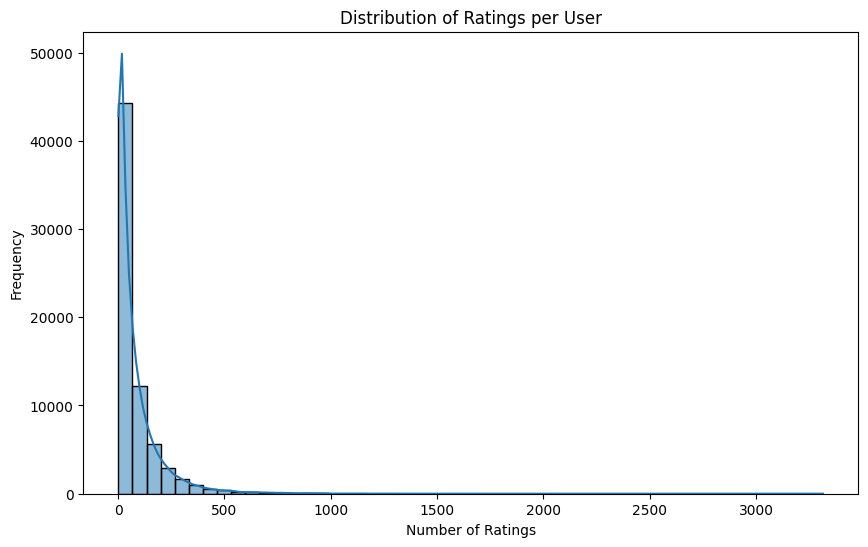

In [30]:
# More user behavior analysis: Active vs Inactive users


# Calculate the number of ratings per user
user_ratings_count = df_merged.groupby('user_id')['user_rating'].count()

# Descriptive statistics
print(user_ratings_count.describe())

# Visualize distribution
plt.figure(figsize=(10, 6))
sns.histplot(user_ratings_count, bins=50, kde=True)
plt.title('Distribution of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()


The distribution of ratings per user, provides insights into user engagement levels (active vs. inactive users). We can see that we have more inactive users than active users.

* Rating Behavior Based on User Activity:
    - Identify Active and Inactive Users: Define thresholds based on the distribution in step 2 to categorize users as active or inactive.

In [31]:
## Collaborative Filtering Analysis
# Number of unique users and anime
num_users = df_anime_user_rating['user_id'].nunique()
num_anime = df_anime_user_rating['anime_id'].nunique()
print(f'Number of unique users: {num_users}')
print(f'Number of unique anime: {num_anime}')

Number of unique users: 69481
Number of unique anime: 9838


In [32]:
# More user Activity Analysis: Exploring User Ratings

# Define thresholds
active_threshold = user_ratings_count.quantile(0.75)
inactive_threshold = user_ratings_count.quantile(0.25)

# Identify active and inactive users
active_users = user_ratings_count[user_ratings_count > active_threshold].index
inactive_users = user_ratings_count[user_ratings_count < inactive_threshold].index

print(f"Number of active users: {len(active_users)}")
print(f"Number of inactive users: {len(inactive_users)}")


Number of active users: 17326
Number of inactive users: 17288


We have `69,481` total users, but only `34,614` (17,326 active + 17,288 inactive) are accounted for in our user activity analysis.

In [33]:
# Define custom thresholds
very_active_threshold = user_ratings_count.quantile(0.9)
active_threshold = user_ratings_count.quantile(0.75)
inactive_threshold = user_ratings_count.quantile(0.25)
very_inactive_threshold = user_ratings_count.quantile(0.1)

# Create a new DataFrame with user_id and user_type columns
user_activity = pd.DataFrame({'user_id': user_ratings_count.index})

# Assign user types based on thresholds
user_activity['user_type'] = np.where(
    user_ratings_count > very_active_threshold, 'very_active',
    np.where(user_ratings_count > active_threshold, 'active',
            np.where(user_ratings_count < inactive_threshold, 'inactive', 'low_activity'))
)

print(user_activity['user_type'].value_counts())

user_type
low_activity    34867
inactive        17288
active          10402
very_active      6924
Name: count, dtype: int64


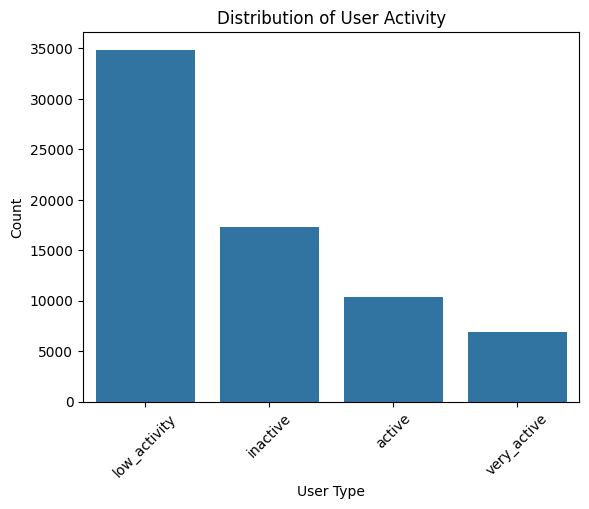

In [34]:
# Visualize user activity distribution
# Define the desired user type order
user_type_order = ['low_activity', 'inactive', 'active', 'very_active']

# Visualize user activity distribution
sns.countplot(x='user_type', data=user_activity, order=user_type_order)
plt.title('Distribution of User Activity')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

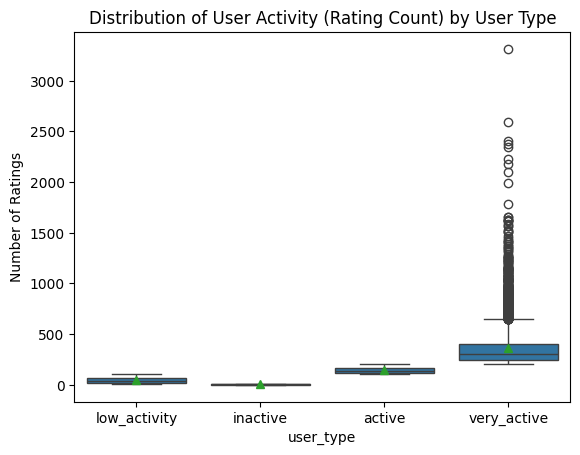

In [35]:

# Create a new DataFrame with user_id, user_type, and rating_count columns
user_activity = pd.DataFrame({
    'user_id': user_ratings_count.index,
    'rating_count': user_ratings_count.values
})

# Assign user types based on thresholds
user_activity['user_type'] = np.where(
    user_ratings_count > very_active_threshold, 'very_active',
    np.where(user_ratings_count > active_threshold, 'active',
            np.where(user_ratings_count < inactive_threshold, 'inactive', 'low_activity'))
)

# Visualize distribution of user activity (rating count) by user type

# Define the desired user type order
user_type_order = ['low_activity', 'inactive', 'active', 'very_active']

sns.boxplot(
    x='user_type',order=user_type_order,
    y='rating_count',
    data=user_activity,
    showmeans=True
)
plt.title('Distribution of User Activity (Rating Count) by User Type')
plt.ylabel('Number of Ratings')
plt.show()

Here we analyzed the average rating behavior of active (active & very active) vs. inactive (low_activitiy & inactive) users. It helps understand if these groups have systematic differences in their rating patterns, which can be valuable for recommendations.

In [36]:
# Create a pivot table

rating_distribution = df_merged.pivot_table(
index='user_id',
columns='user_rating',
values='anime_id',
aggfunc='count',
fill_value=0
)

print(rating_distribution.head())

user_rating  1   2   3   4   5   6    7    8   9   10
user_id                                              
1             0   0   0   0   0   0    0    0   0   3
2             0   0   0   0   0   0    0    0   0   1
3             0   0   2   1   2  13   26   21   8  12
5            70  52  45  29  74  50   51   32   7   2
7             0   0   0   3  14  36  107  112  39   6


* Each row represents a user.
* Each column represents a rating value (1 to 10).
<br>

The values in the table represent the count of anime with that rating for each user.
By analyzing this pivot table, we can understand how users distribute their ratings across different rating scales.

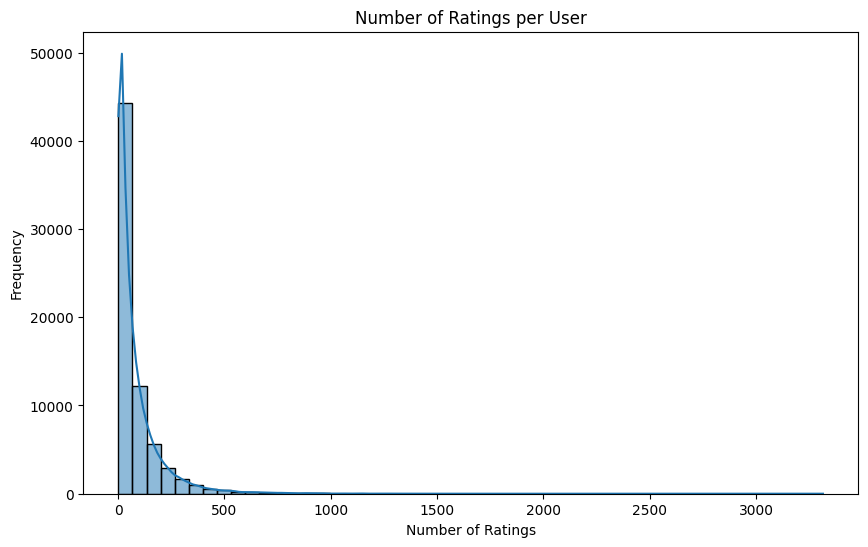

In [37]:
## User behavior analysis
# Number of ratings per user
user_ratings_count = df_merged.groupby('user_id').size()
plt.figure(figsize=(10,6))
sns.histplot(user_ratings_count, bins=50, kde=True)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()


## 2. Anime content-related: Content behavior analysis

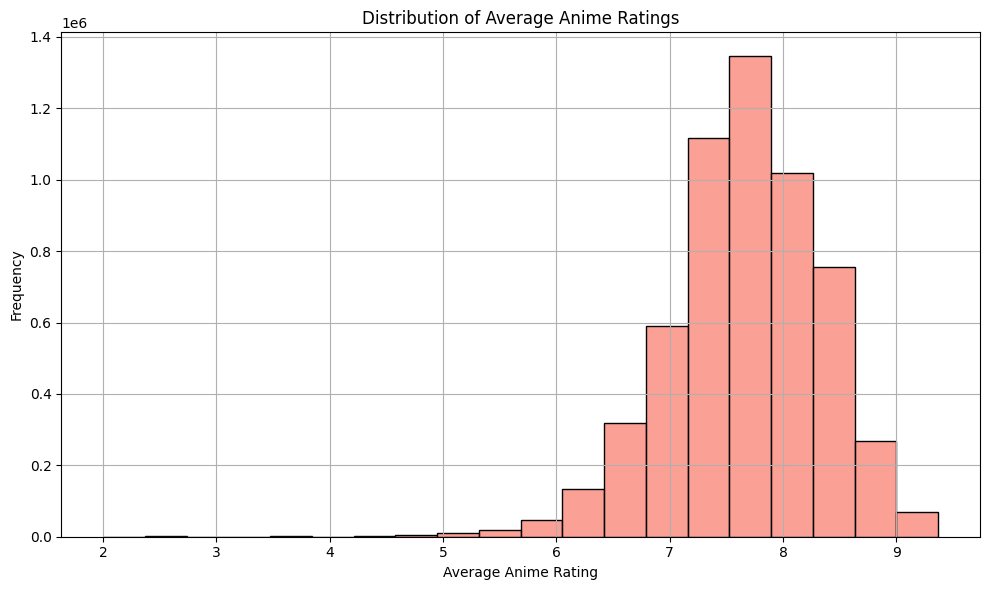

In [38]:
# Visualize distribution of average anime ratings
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['average_anime_rating'], bins=20, kde=False, color='salmon')
plt.title('Distribution of Average Anime Ratings')
plt.xlabel('Average Anime Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

* Distribution of anime types

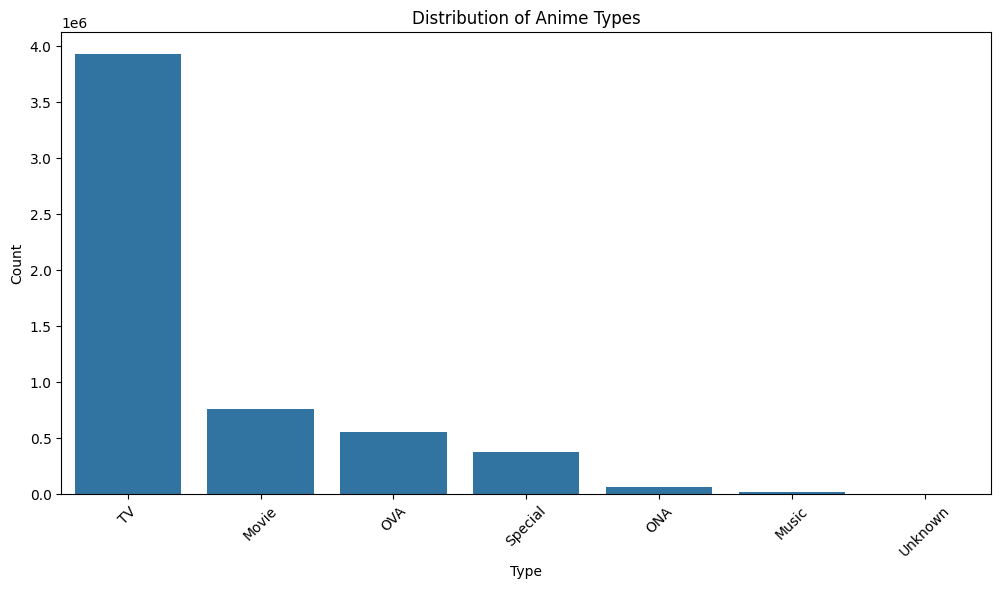

In [39]:
# Count plot for anime types
plt.figure(figsize=(12, 6))
sns.countplot(data=df_merged, x='type', order=df_merged['type'].value_counts().index)
plt.title('Distribution of Anime Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

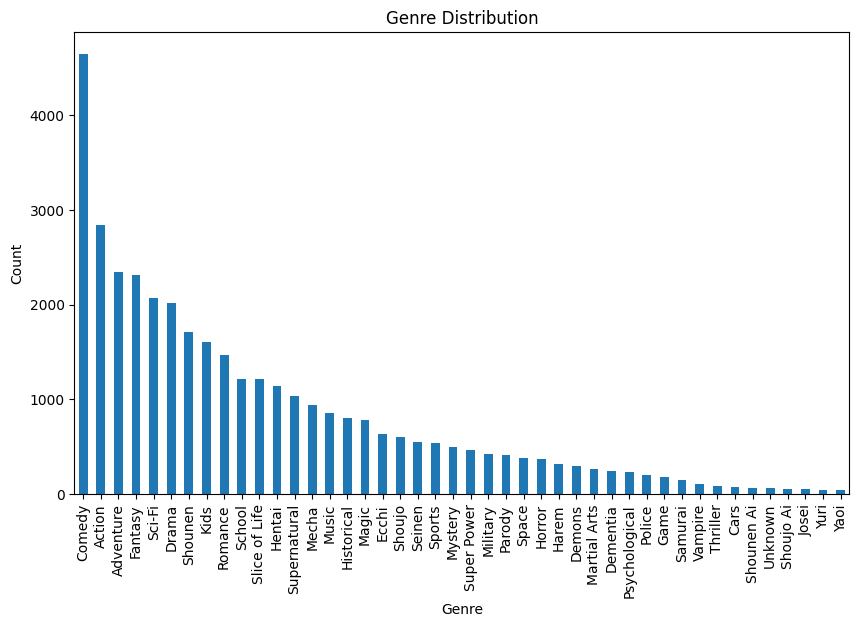

In [40]:
## Content-Based Filtering Analysis
# Analysis of genres
genre_count = df_anime['genre'].str.get_dummies(sep=', ').sum()
plt.figure(figsize=(10,6))
genre_count.sort_values(ascending=False).plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

* Top 10 genres

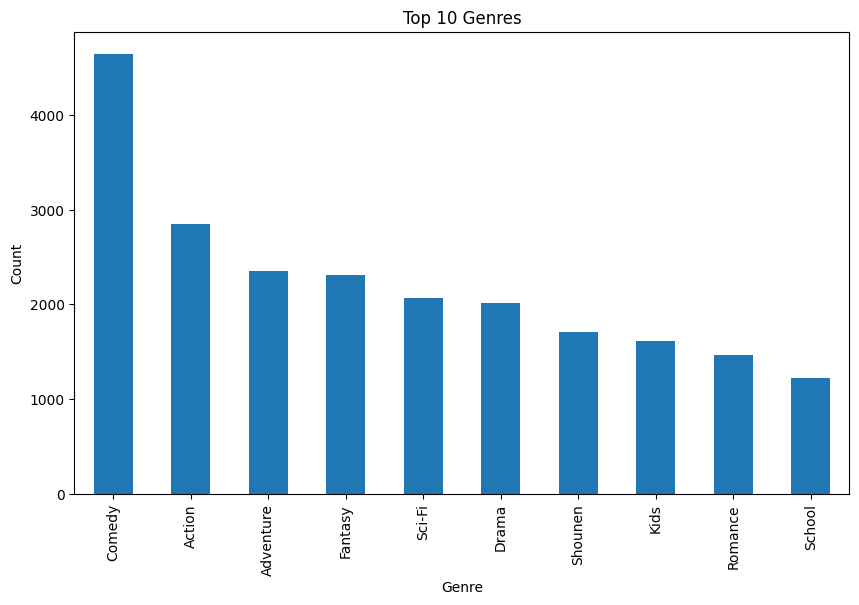

In [41]:
## Top 10 genres
top_genres = df_anime['genre'].str.get_dummies(sep=', ').sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_genres.plot(kind='bar')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

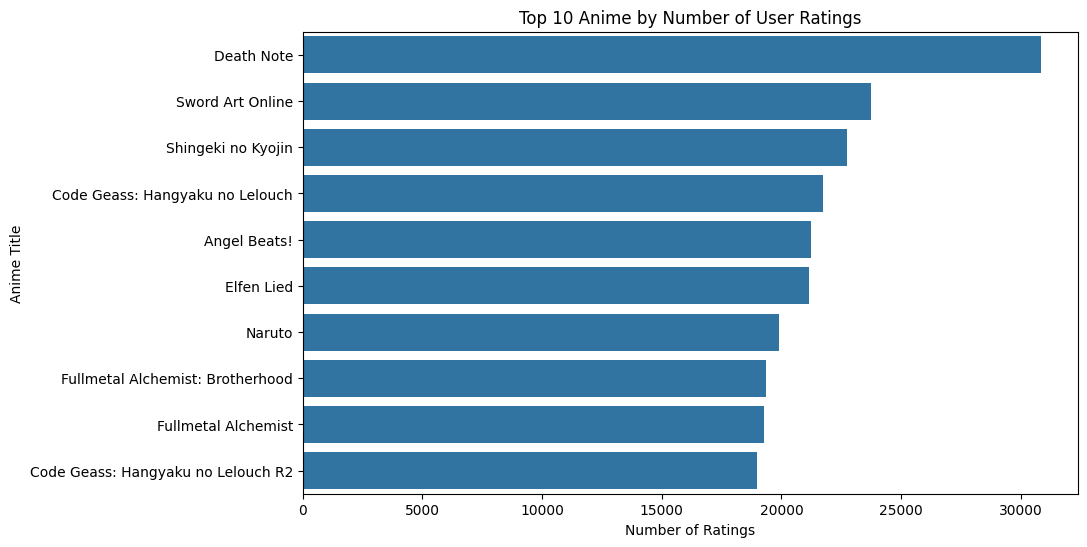

In [42]:
## Popular anime analysis
# Top 10 anime by number of user ratings
top_anime_by_ratings = df_anime_user_rating['anime_id'].value_counts().head(10)
top_anime_titles = df_anime.set_index('anime_id').loc[top_anime_by_ratings.index]['name']
plt.figure(figsize=(10,6))
sns.barplot(y=top_anime_titles, x=top_anime_by_ratings, orient='h')
plt.title('Top 10 Anime by Number of User Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Anime Title')
plt.show()

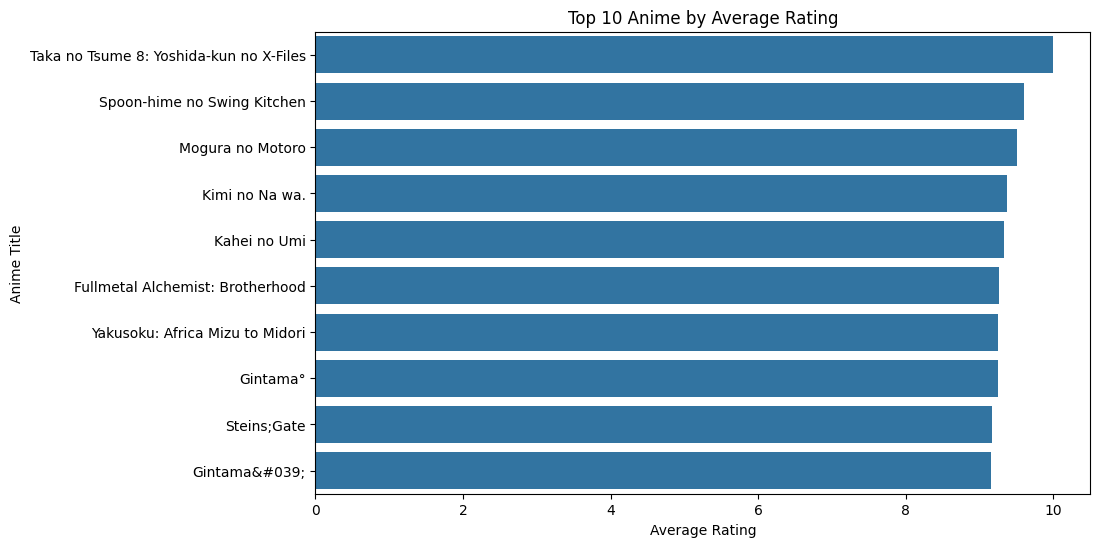

In [43]:
# Top 10 anime by average rating
top_anime_by_avg_rating = df_anime.groupby('anime_id')['rating'].mean().sort_values(ascending=False).head(10)
top_anime_titles_avg = df_anime.set_index('anime_id').loc[top_anime_by_avg_rating.index]['name']
plt.figure(figsize=(10,6))
sns.barplot(y=top_anime_titles_avg, x=top_anime_by_avg_rating, orient='h')
plt.title('Top 10 Anime by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Anime Title')
plt.show()

* Top rated animes

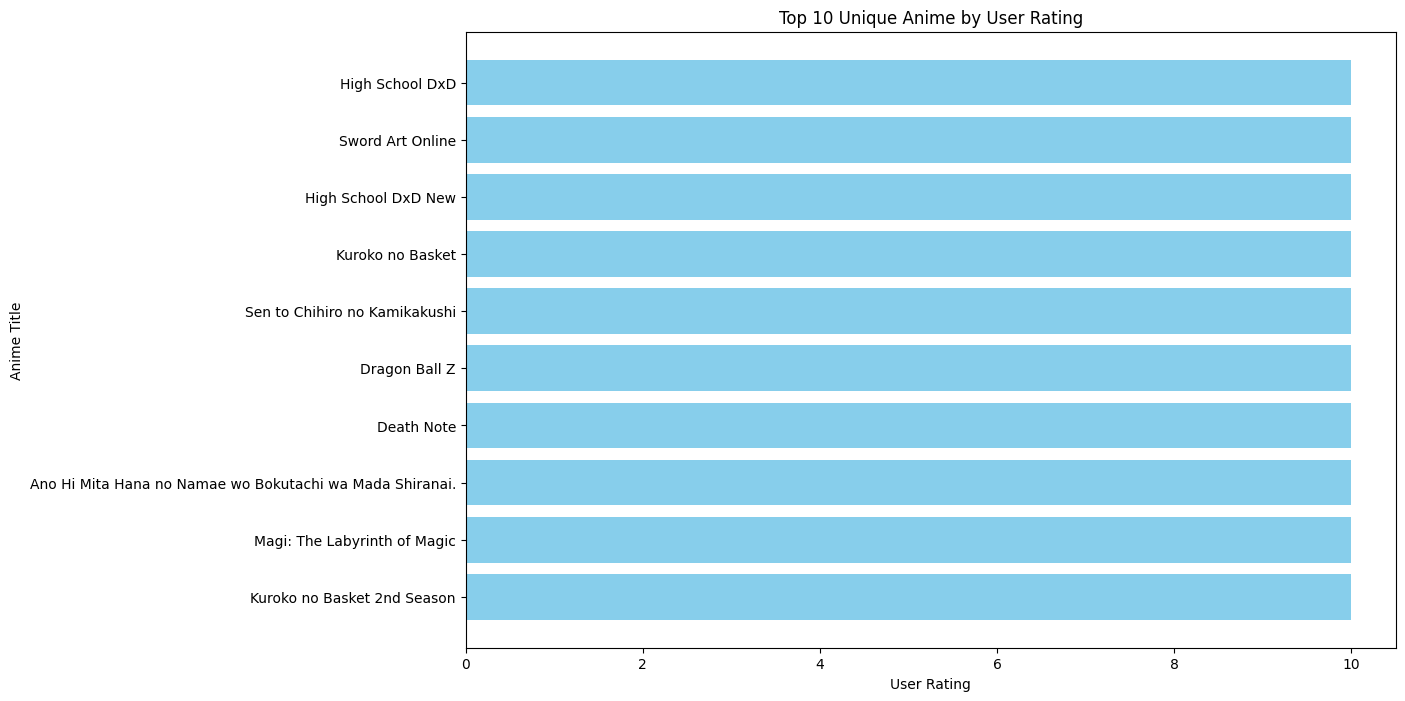

In [44]:
# Remove duplicates based on anime name
unique_animes = df_merged.drop_duplicates(subset='name')

# Get the top 10 unique animes by user rating
top_rated_unique_animes = unique_animes.nlargest(10, 'user_rating')[['name', 'user_rating']]

# Visualize top 10 unique user rated animes
plt.figure(figsize=(12, 8))
plt.barh(
    top_rated_unique_animes['name'],
    top_rated_unique_animes['user_rating'],
    color='skyblue'
)
plt.title('Top 10 Unique Anime by User Rating')
plt.xlabel('User Rating')
plt.ylabel('Anime Title')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest-rated anime at the top
plt.show()

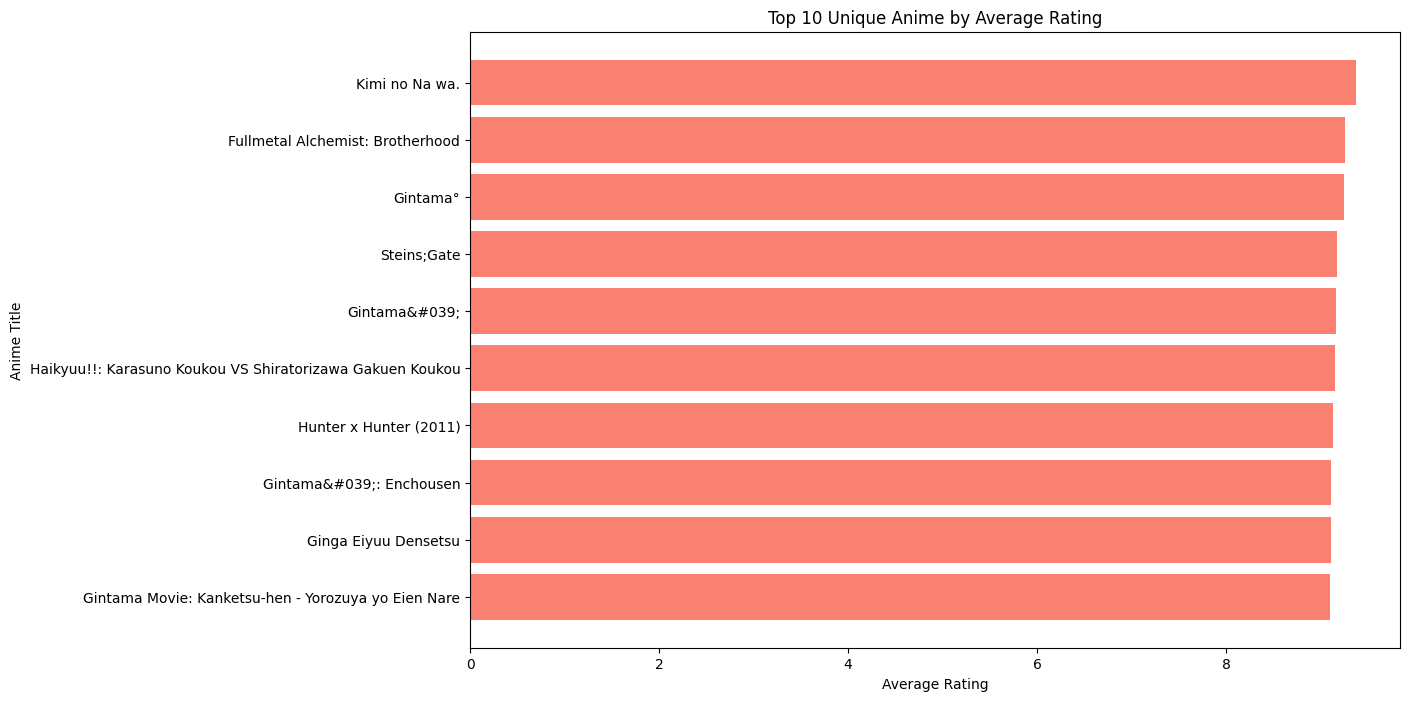

In [45]:
# Get the top 10 unique animes by average rating
top_rated_unique_animes = unique_animes.nlargest(10, 'average_anime_rating')[['name', 'average_anime_rating']]

# Visualize top 10 unique rated animes
plt.figure(figsize=(12, 8))
plt.barh(
    top_rated_unique_animes['name'],
    top_rated_unique_animes['average_anime_rating'],
    color='salmon'
)
plt.title('Top 10 Unique Anime by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Anime Title')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest-rated anime at the top
plt.show()


Looking at the top 10 animes based on user ratings, and the top 10 for average_anime ratings, they are quite different. This may imply that the user ratings data was taken from a certain audience (a young audience to be specific).

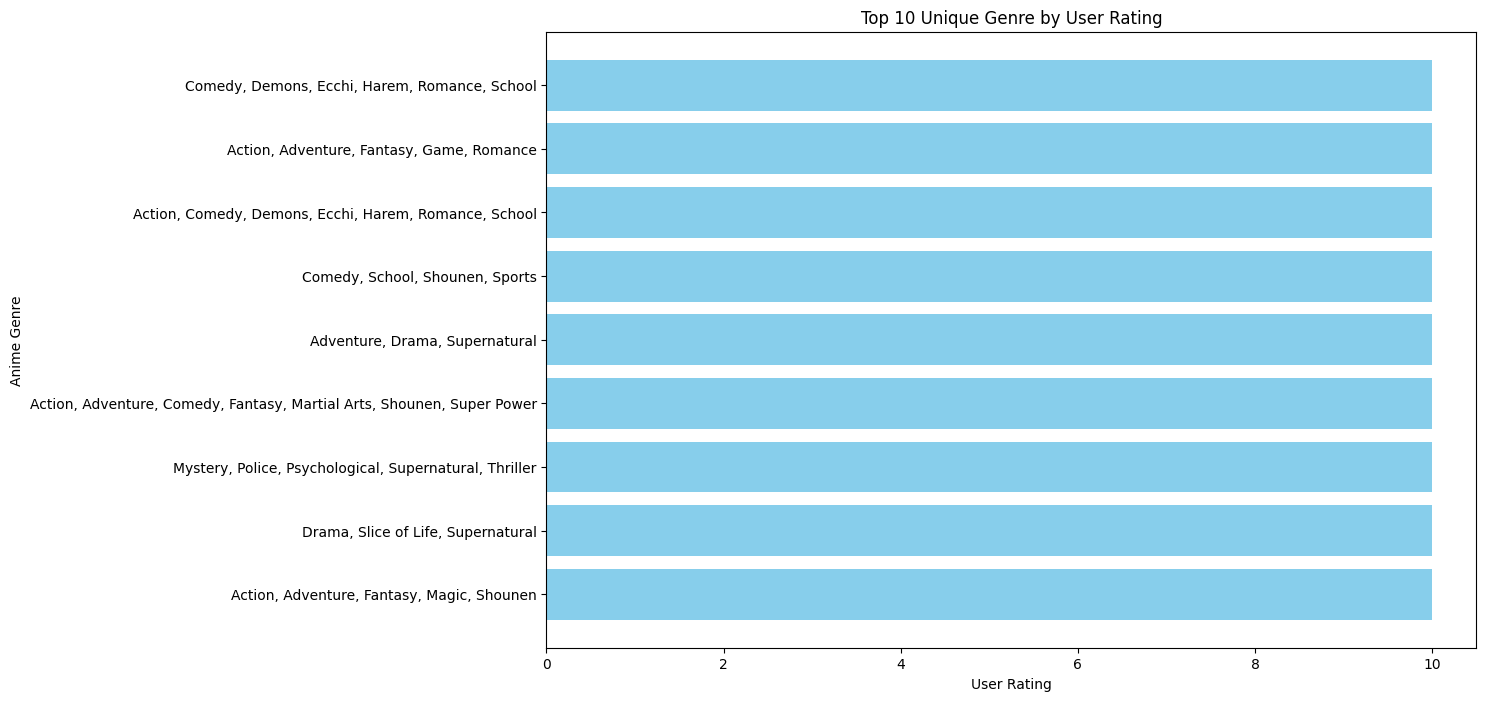

In [46]:
# Remove duplicates based on anime genre
unique_genres = df_merged.drop_duplicates(subset='genre')

# Get the top 10 unique genre by user rating
top_rated_unique_animes = unique_animes.nlargest(10, 'user_rating')[['genre', 'user_rating']]

# Visualize top 10 unique user rated genres
plt.figure(figsize=(12, 8))
plt.barh(
    top_rated_unique_animes['genre'],
    top_rated_unique_animes['user_rating'],
    color='skyblue'
)
plt.title('Top 10 Unique Genre by User Rating')
plt.xlabel('User Rating')
plt.ylabel('Anime Genre')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest-rated anime at the top
plt.show()

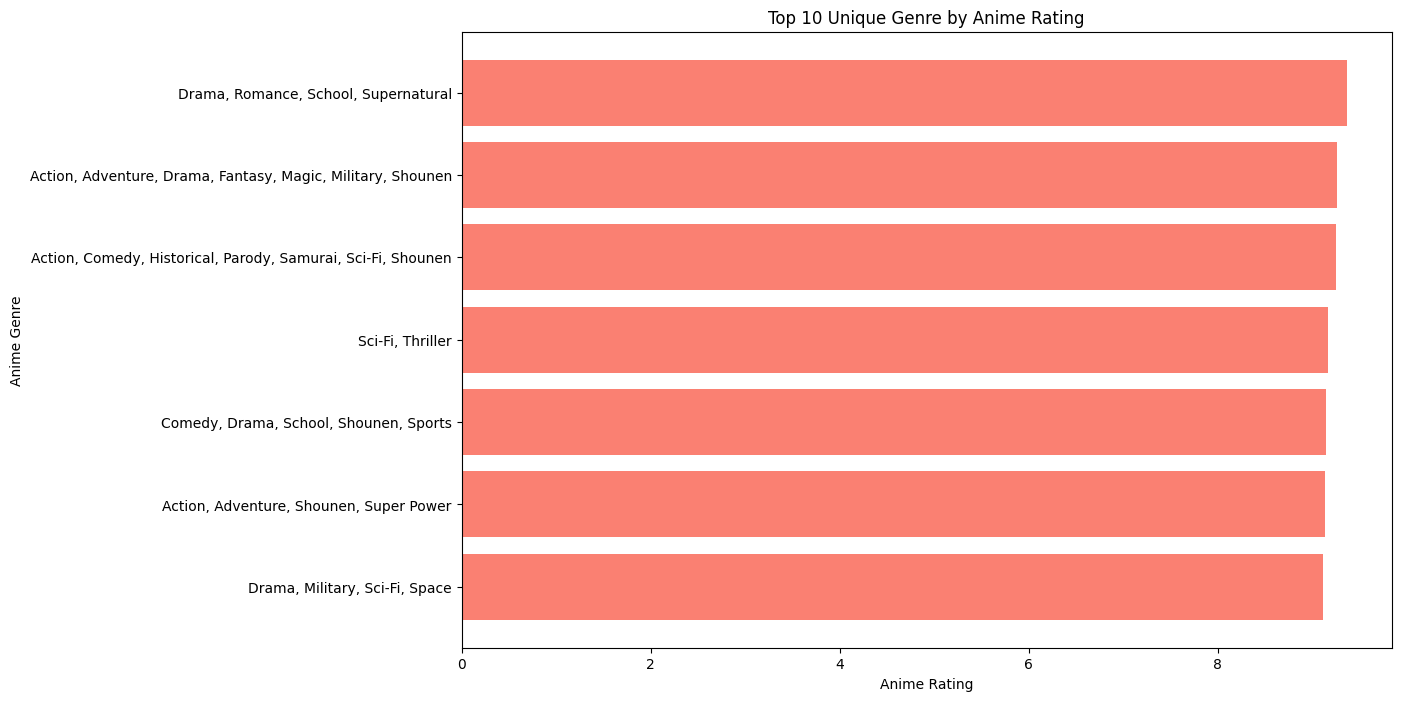

In [47]:
# Get the top 10 unique genre by anime rating
top_rated_unique_animes = unique_animes.nlargest(10, 'average_anime_rating')[['genre', 'average_anime_rating']]

# Visualize top 10 unique average anime rated genres
plt.figure(figsize=(12, 8))
plt.barh(
    top_rated_unique_animes['genre'],
    top_rated_unique_animes['average_anime_rating'],
    color='salmon'
)
plt.title('Top 10 Unique Genre by Anime Rating')
plt.xlabel('Anime Rating')
plt.ylabel('Anime Genre')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest-rated anime at the top
plt.show()

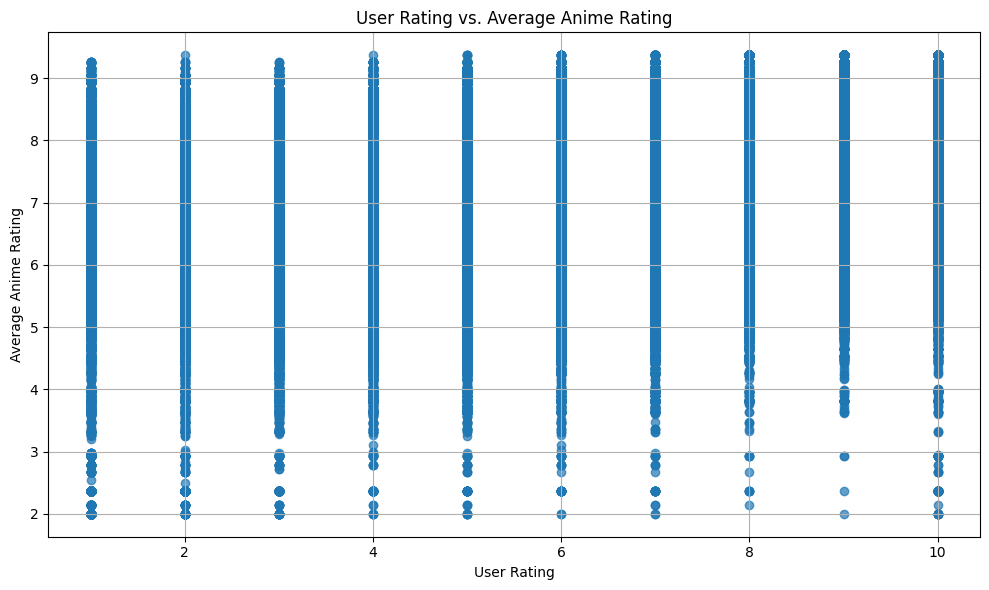

In [48]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df_merged['user_rating'],
    df_merged['average_anime_rating'],
    alpha=0.7
)

plt.title('User Rating vs. Average Anime Rating')
plt.xlabel('User Rating')
plt.ylabel('Average Anime Rating')
plt.grid(True)
plt.tight_layout()  # Adjust layout to make space for labels and grid
plt.show()

The scatterplot shows that users gives a wide range of ratings regardless of the anime's average rating.

- Correlation analysis

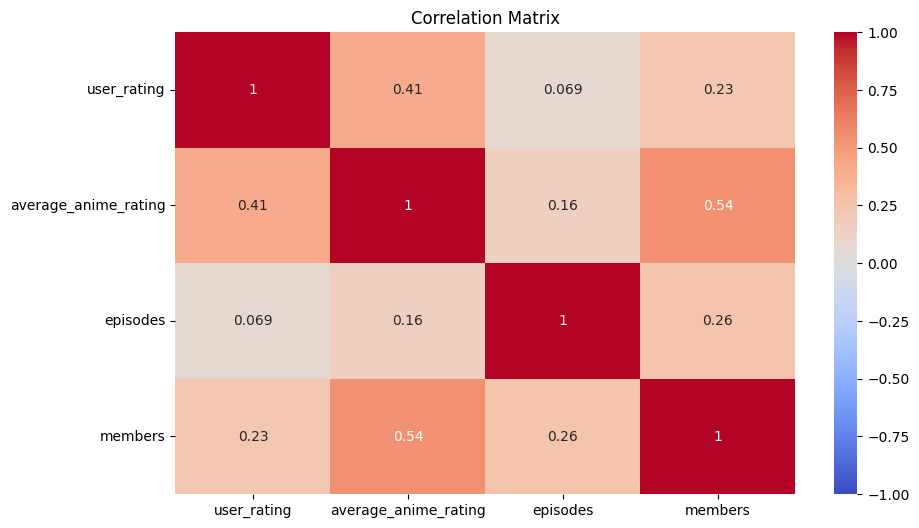

In [49]:
# Correlation matrix
corr_matrix = df_merged[['user_rating', 'average_anime_rating', 'episodes', 'members']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


***

<a id="7"></a>
# <p style="padding:10px;background-color:#32a8a8;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 2px 2px;overflow:hidden;font-weight:500">Data Preprocessing</p>

<div class="alert alert-block alert-info">
<b>Data preprocessing</b> is a crucial step in building any machine learning model. It involves transforming raw data into a clean, structured format that is suitable for analysis. This step includes various tasks such as encoding categorical variables, normalizing data, and feature extraction. Proper data preprocessing ensures that the data is of high quality, which in turn improves the performance of the machine learning models. This involves encoding of categorical
variables, ensuring uniformity and compatibility for subsequent analyses. </di>

In [50]:
!pip install implicit

In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from surprise import Dataset, Reader, SVD, BaselineOnly, CoClustering
from surprise.model_selection import train_test_split as surprise_train_test_split
from math import sqrt
import implicit

<div class="alert alert-block alert-info">
<b>Normalization and Feature Extraction</b> is an important step in the data preprocessing process, to ensure fair comparisons and accurate analyses, data normalization is applied where appropriate.
Numeric attributes are scaled to a common range, mitigating the influence of variables with larger magnitudes. Additionally, feature extraction techniques are employed to distill essential information
from raw data. This process may involve creating new attributes, calculating statistical measures, or generating user-specific features.
</di>

In [52]:
# Normalization & Feature Extraction

# Load DataFrame
df = df_merged.copy()

# Scaling the numeric columns
numeric_cols = ['episodes', 'members']
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Scale the 'average_anime_rating' column between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled_score'] = scaler.fit_transform(df[['average_anime_rating']])

# Encoding user IDs
user_encoder = LabelEncoder()
df["user_encoded"] = user_encoder.fit_transform(df["user_id"])
num_users = len(user_encoder.classes_)

# Encoding anime IDs
anime_encoder = LabelEncoder()
df["anime_encoded"] = anime_encoder.fit_transform(df["anime_id"])
num_animes = len(anime_encoder.classes_)

print("Number of unique users: {}, Number of unique anime: {}".format(num_users, num_animes))


Number of unique users: 69481, Number of unique anime: 9838


***